# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

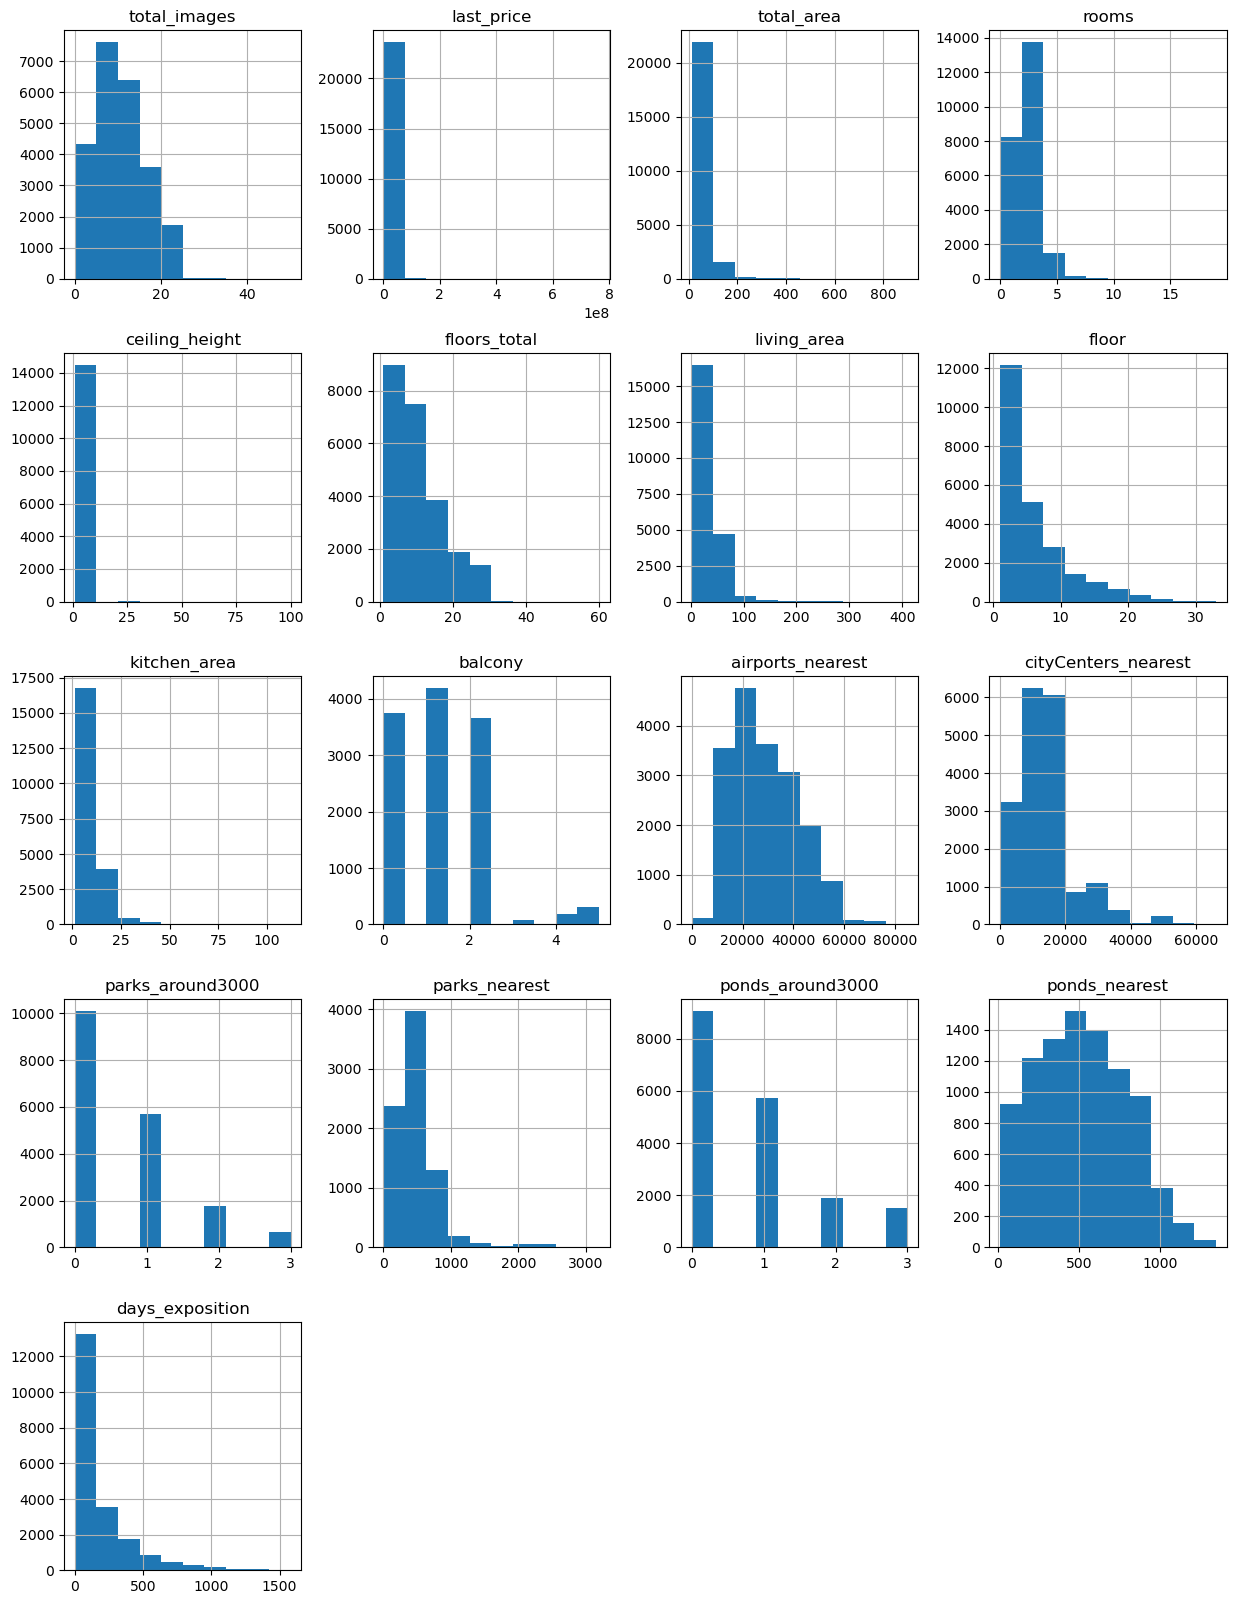

In [1]:
import pandas as pd # импортировал библиотеку пандас как pd
import matplotlib.pyplot as plt #импортирую библиотеку matplotlib
data = pd.read_csv('C:/Users/ObWan/Desktop/Мои проекты для GitHab/Исследовательский анализ данных/real_estate_data.csv', sep='\t') # считал данные из csv-файла в в датафрем и сохранил в переменную data
display(data.head(20)) # вывел первые 20 строчек датафрема data на экран.
data.info() # вывел на экран общую информацию о данных
data.hist(figsize=(15, 20)); # вывел гистограммы для столбцов

# 2 Предобработка данных

In [2]:
print(data.columns) # посмотрим информацию по столбцам, для выявления нестандартных значений.
print(data.isna().sum()) # видим, что в столбцах (ceiling_height, living_area, is_apartment, kitchen_area, balcony, 
#locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, 
#ponds_nearest, days_exposition) имеются пропуски. Попробую с ними разобраться, где заменим на ноль, где на ср. значения.

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_aroun

In [3]:
#проверю на отрицательные значения используя цикл
for column_name in data.dtypes.index:
    if data[column_name].dtypes=='int64' or data[column_name].dtypes=='float64':# проверка на принадлежность данных к числовым типам
        
        if data[data[column_name] < 0][column_name].count() > 0:
            print('|{: <20}|{: >4}|'.format(column_name, 'Есть'))
        else:
            print('|{: <20}|{: >4}|'.format(column_name, 'Нет'))

|total_images        | Нет|
|last_price          | Нет|
|total_area          | Нет|
|rooms               | Нет|
|ceiling_height      | Нет|
|floors_total        | Нет|
|living_area         | Нет|
|floor               | Нет|
|kitchen_area        | Нет|
|balcony             | Нет|
|airports_nearest    | Нет|
|cityCenters_nearest | Нет|
|parks_around3000    | Нет|
|parks_nearest       | Нет|
|ponds_around3000    | Нет|
|ponds_nearest       | Нет|
|days_exposition     | Нет|


In [4]:
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)# да, есть аномалии, приведу их к общим значениям

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,...,NaN,NaN,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
14382,9,1700000.0,35.0,2015-12-04T00:00:00,1,25.0,5.0,20.0,2,False,...,8.0,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0
11285,0,1950000.0,37.0,2019-03-20T00:00:00,1,25.0,5.0,17.0,4,False,...,9.0,2.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


In [5]:
print(data.loc[data.loc[:,'ceiling_height']>20]['ceiling_height'].count())# посчитал число строк, где значения выбиваются из общей картины

22


In [6]:
data.loc[data['ceiling_height'] >19, 'ceiling_height'] = data['ceiling_height'] / 10

In [7]:
data_sorted = data.sort_values(by = 'ceiling_height')
display(data_sorted['ceiling_height'].unique()) # избавился от выбивающихся значений;)

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

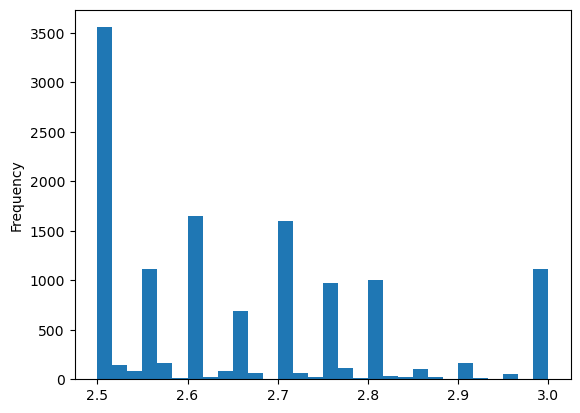

In [8]:
data['ceiling_height'].sort_values().plot(y='celing_height', kind='hist', bins=30, range=(2.5, 3)) # постоили гистограмму для визуализации
data['ceiling_height'].value_counts()
data['ceiling_height'].describe() # методом .describe оцениваем столбец с числовым типом данных

<AxesSubplot:ylabel='Frequency'>

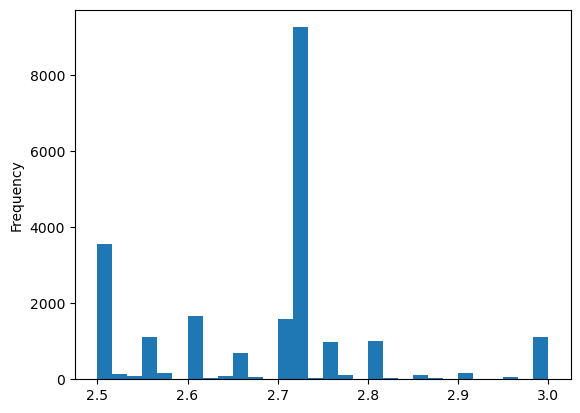

In [9]:
data_mean = data.loc[data['ceiling_height'] == 'Nan', 'ceiling_height'] = data['ceiling_height'].mean() #вывел среднюю по столбцу
data['ceiling_height'].fillna(data_mean, inplace=True)
data['ceiling_height'].sort_values().plot(y='celing_height', kind='hist', bins=30, range=(2.5, 3)) # повторны визуализтровал столбец.
# видим, что сущеcтвенного изменения это не принесло, но я избавился от пропусков.

#### Решил замеить пропуски в этом стобце на среднее, т.к. в среднем потолки у всех одиноковы, да и от медианы средняя не сильно отличается.

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

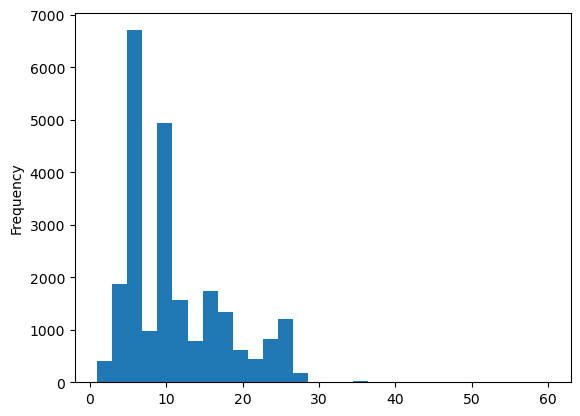

In [10]:
data['floors_total'].sort_values().plot(y='floors_total', kind='hist', bins=30, range=(1,60))
data['floors_total'].value_counts()
data['floors_total'].describe() # методом .describe оцениваем столбец с числовым типом данных

#### Видим, что распределние этажности в среднем, это 10 этажей, стандартное 6-7 этажей. Есть смысл заполнение пропусков максимальным значением этажности. 

In [11]:

data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [12]:
print(data['floor'].max())# вычислили максимальное значение столбца floor, после чего заполню не средним, а макс значением все пропуски.

33


count    23699.000000
mean        10.754842
std          6.720646
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

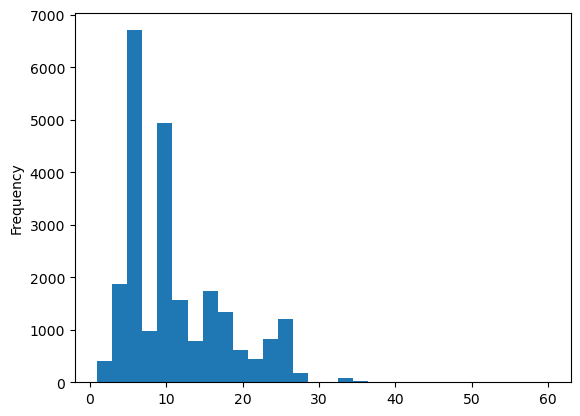

In [13]:
data['floors_total'] = data['floors_total'].fillna(33)
data['floors_total'].sort_values().plot(y='floors_total', kind='hist', bins=30, range=(1,60))
data['floors_total'].describe()

In [14]:
['floors_total'] > ['floor']

True

#### Заменил пропуски на макс этаж (33), как видно из проверки выше, утверждение верно:) 

In [15]:
data['living_area'].value_counts()
data['living_area'].describe() # методом .describe оцениваем столбец с числовым типом данных

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

#### В этом столбце слишком много знаков после запятой, также есть пропущенные значения, можно их заменить также на среднюю, но это на стоимость не повлияет, т.к. расчет будет выводиться за кв.м. от общей площади квартиры. Не буду на этом останавливаться чтоб не терять время.

In [16]:
data['is_apartment'].value_counts()
data['is_apartment'].describe() # методом .describe оцениваем столбец с числовым типом данных

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

#### Столбец аппартаменты с пропущенными значениями можно заменить на false, возможно при подаче объявлений люди просто не знают что это такое либо он появился позже.

In [17]:
data['is_apartment'] =  data['is_apartment'].fillna(False)

In [18]:
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


In [19]:
data['kitchen_area'].value_counts()
data['kitchen_area'].describe() # методом .describe оцениваем столбец с числовым типом данных

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [20]:
['total_area'] > ['living_area' + 'kitchen_area']

True

In [21]:
['абракадабра'] > ['living_area' + 'kitchen_area']

True

#### Выполнил проверку всех площадей, общая площадь больше суммы площадей жилой и кухни, все в порядке.

In [22]:
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


In [23]:
data['balcony'].value_counts()
data['balcony'].describe()
# Тут пропуски заменим на ноль и изменим тип данных на int как по заданию;)

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [24]:
data['balcony']=data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [25]:
data_sorted = data.sort_values(by = 'locality_name')
display(data_sorted['locality_name'].unique()) # имеются артефакты, есть смысл их привести к общим названиям
# тут пропуски трогать не буду. так как на что менять не понятно и почему они там появились тоже не ясно.

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [26]:
# в названиях поселок используется два (е,ё), заменю все ё на е:
import re
i=0
for ind_str in data.loc[(data['locality_name'].isna()==False),'locality_name'].index:    
    loc_str = data.loc[ind_str, 'locality_name']
    if ('ё' or 'Ё') in loc_str:
        i+=1
        loc_str = re.sub('ё', 'е', loc_str)
        loc_str = re.sub('Ё', 'Е', loc_str)
    data.loc[ind_str, 'locality_name'] = loc_str
print()        
print("Кол-во строк где произведена замена =", i)


Кол-во строк где произведена замена = 2146


In [27]:
print(data['locality_name'].value_counts())

Санкт-Петербург                     15721
поселок Мурино                        556
поселок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: locality_name, Length: 330, dtype: int64


In [28]:
i = 0 # счетчик
for ind_str in data.loc[(data['locality_name'].isna()==False),'locality_name'].index:    
    loc_str = data.loc[ind_str, 'locality_name']
    if 'городской поселок' in loc_str:
        print(loc_str)
        loc_str = re.sub('городской поселок', 'поселок городского типа', loc_str)
        i+=1
        data.loc[ind_str, 'locality_name'] = loc_str
        print(data.loc[ind_str, 'locality_name'])
print("Кол-во строк где произведена замена =", i)
# привел к общим названиям поселок, городской поселок, на поселок городского типа, т.к правильное название поселок городского типа или ПГТ

городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Большая Ижора
поселок городского типа Большая Ижора
городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Павлово
поселок городского типа Павлово
городской поселок Лесогорский
поселок городского типа Лесогорский
городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Большая Ижора
поселок городского типа Большая Ижора
городской поселок Новоселье
поселок городского типа Новоселье
городской поселок Федоровское
поселок городского типа Федоровское
городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Мга
поселок городского типа Мга
городской поселок Янино-1
поселок городского типа Янино-1
городской поселок Новоселье
поселок 

In [29]:
data['airports_nearest'].value_counts()
data['airports_nearest'].describe()
# тут пропуски можно заменить на медиану, т.к. этот столбец нам дальше будет нужен, как один из ценообразующих факторов.

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [30]:
data_airports_nearest = data.loc[data['airports_nearest'] == 'Nan', 'airports_nearest'] = data['airports_nearest'].mean() #вывел среднюю по столбцу
data['airports_nearest'].fillna(data_airports_nearest, inplace=True)

In [31]:
data['locality_name'] = data['locality_name'].fillna(0)# заменю NaN на нули, после методом dropna их удалю.
data.dropna(subset=['locality_name'])#удалил пропуски где нет названия населенного пункта. Считаю нам они не нужны. 49 объяылений на общую картину не повлияют из общей массы.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.000000,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.729608,11.0,18.6,1,False,...,11.00,2,поселок Шушары,12817.000000,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.729608,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.000000,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.729608,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.000000,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.000000,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700000,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.000000,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.729608,5.0,38.0,4,False,...,8.50,0,Тосно,28793.672193,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.729608,3.0,29.7,1,False,...,NaN,0,село Рождествено,28793.672193,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.000000,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.000000,10364.0,2.0,173.0,3.0,196.0,602.0


In [32]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

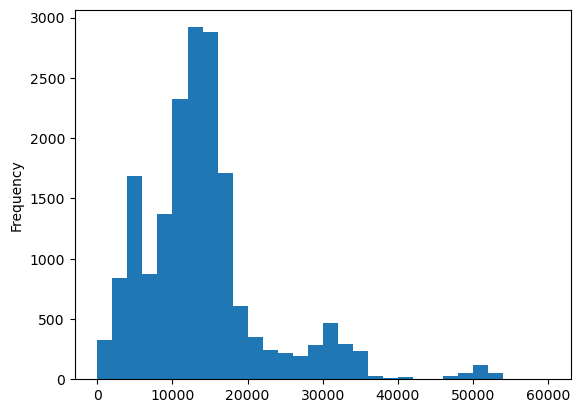

In [33]:
data['cityCenters_nearest'].sort_values().plot(y='cityCenters_nearest', kind='hist', bins=30, range=(1,60000))
data['cityCenters_nearest'].value_counts()
data['cityCenters_nearest'].describe()

#### Визуализировал расстояние от ОН до центра. Видно, что оcновная масса квартир имеет расстояние до центра в промежетке от 13 км до 16, в среднем 14191.27 метров.

In [34]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Изучил распределние поропусков по городам, 49 объявлений без названия населенного пункта, решил их удалить. 

In [35]:
data['parks_around3000'].value_counts()
data['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

#### Менять пропуски в этом столбце я не буду, т.к. не знаю их природу, возможно там где они есть просто нет парков в радиусе 3000м.

In [36]:
data['parks_nearest'].value_counts()
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

#### Тут есть смысл заменить на медиану, т.к. парки есть в любом городе. Исключать их нельзя из анализа.

In [37]:
data_parks_nearest = data.loc[data['parks_nearest'] == 'Nan', 'parks_nearest'] = data['parks_nearest'].median() #вывел среднюю по столбцу
data['parks_nearest'].fillna(data_parks_nearest, inplace=True)

In [38]:
data['ponds_around3000'].value_counts()
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

#### Менять пропуски в этом столбце я не буду, т.к. не знаю их природу, возможно нет данных о наличии и количестве водоемов в радиусе 3км.

In [39]:
data['ponds_nearest'].value_counts()
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

#### Менять пропуски в этом столбце я не буду, т.к. не знаю их природу, возможно нет данных о расстоянии до водоемов.

In [40]:
data['days_exposition'].value_counts()
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [41]:
# столбец first_day_exposition, переведм в формат без времени, т.к. оно не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%d')

In [42]:
print(data.columns)
print(data.isna().sum())

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest               0
ponds_aroun

#### Как видно из общей информации о данных столбцов, где можно было заменить пропуски, то там была выполнена замена на нули, где-то на макс значения(пропуски в этажности зданий), где это делать не целесообразно, оставил как есть, где-то заменили на среднее значение. Также привели к единообразию написание городов. были изменены типы данных.

In [43]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [44]:
data['floors_total'] = data['floors_total'].astype('int') # сменил тип данных

In [45]:
data[data['rooms'].isna()]['rooms'].count()# пропусков нет

0

In [46]:
data.loc[data['rooms'] == 0, 'rooms'] = 1 # нулевые значения заменил на 1, т.к. ноль комнат не бывает. скорее всего, это студии

In [47]:
#почистим значения, которые портят анализ влияния на стоимость
data = data.query('total_area <= 200 and 200000 < last_price <= 30000000 and rooms <= 5 and 2 <= ceiling_height <= 4 and days_exposition > 1 and floors_total <= 33')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20094 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20094 non-null  int64         
 1   last_price            20094 non-null  float64       
 2   total_area            20094 non-null  float64       
 3   first_day_exposition  20094 non-null  datetime64[ns]
 4   rooms                 20094 non-null  int64         
 5   ceiling_height        20094 non-null  float64       
 6   floors_total          20094 non-null  int32         
 7   living_area           18433 non-null  float64       
 8   floor                 20094 non-null  int64         
 9   is_apartment          20094 non-null  bool          
 10  studio                20094 non-null  bool          
 11  open_plan             20094 non-null  bool          
 12  kitchen_area          18070 non-null  float64       
 13  balcony         

# 3 Добавьте в таблицу новые столбцы

In [48]:
data['price_square_meter'] = data['last_price'] / data['total_area'] # расчет стоимости 1 кв.м.
data['price_square_meter'] = data['price_square_meter'].astype('int') # для удобства восприятия переведу к типу int.
#display(data.head())

In [49]:
data['weekday'] = data['first_day_exposition'].dt.weekday # создал столбец дня недели
data['month'] = data['first_day_exposition'].dt.month # создал столбец месяц
data['year'] = data['first_day_exposition'].dt.year # создал столбец год
#display(data.head())

In [50]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1) # категоризировал этаж
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category
1,7,3350000.0,40.40,2018-12-04,1,2.729608,11,18.60,1,False,...,0.0,455.0,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.729608,5,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.729608,12,14.40,5,False,...,NaN,455.0,NaN,NaN,55.0,95065,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.729608,26,10.60,6,False,...,0.0,455.0,0.0,NaN,155.0,99195,3,11,2017,другой
8,20,2900000.0,33.16,2018-05-23,1,2.729608,27,15.43,26,False,...,NaN,455.0,NaN,NaN,189.0,87454,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9,43.60,7,False,...,0.0,455.0,0.0,NaN,289.0,88524,6,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.670000,12,20.30,3,False,...,1.0,310.0,2.0,553.0,137.0,127525,3,11,2017,другой
11,9,3300000.0,44.00,2018-08-27,2,2.729608,5,31.00,4,False,...,0.0,455.0,0.0,NaN,7.0,75000,0,8,2018,другой
12,10,3890000.0,54.00,2016-06-30,2,2.729608,5,30.00,5,False,...,NaN,455.0,NaN,NaN,90.0,72037,3,6,2016,последний


In [51]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
#data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

In [52]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category,cityCenters_nearest_km
1,7,3350000.0,40.40,2018-12-04,1,2.729608,11,18.60,1,False,...,455.0,0.0,NaN,81.0,82920,1,12,2018,первый,18.603
2,10,5196000.0,56.00,2015-08-20,2,2.729608,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,13.933
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.098
5,10,2890000.0,30.40,2018-09-10,1,2.729608,12,14.40,5,False,...,455.0,NaN,NaN,55.0,95065,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.729608,26,10.60,6,False,...,455.0,0.0,NaN,155.0,99195,3,11,2017,другой,19.143
8,20,2900000.0,33.16,2018-05-23,1,2.729608,27,15.43,26,False,...,455.0,NaN,NaN,189.0,87454,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9,43.60,7,False,...,455.0,0.0,NaN,289.0,88524,6,2,2017,другой,15.008
10,5,5050000.0,39.60,2017-11-16,1,2.670000,12,20.30,3,False,...,310.0,2.0,553.0,137.0,127525,3,11,2017,другой,13.878
11,9,3300000.0,44.00,2018-08-27,2,2.729608,5,31.00,4,False,...,455.0,0.0,NaN,7.0,75000,0,8,2018,другой,51.677
12,10,3890000.0,54.00,2016-06-30,2,2.729608,5,30.00,5,False,...,455.0,NaN,NaN,90.0,72037,3,6,2016,последний,NaN


# 4 Исследовательский анализ данных

count    20094.000000
mean        56.047090
std         23.825867
min         12.000000
25%         39.140000
50%         50.000000
75%         66.300000
max        200.000000
Name: total_area, dtype: float64

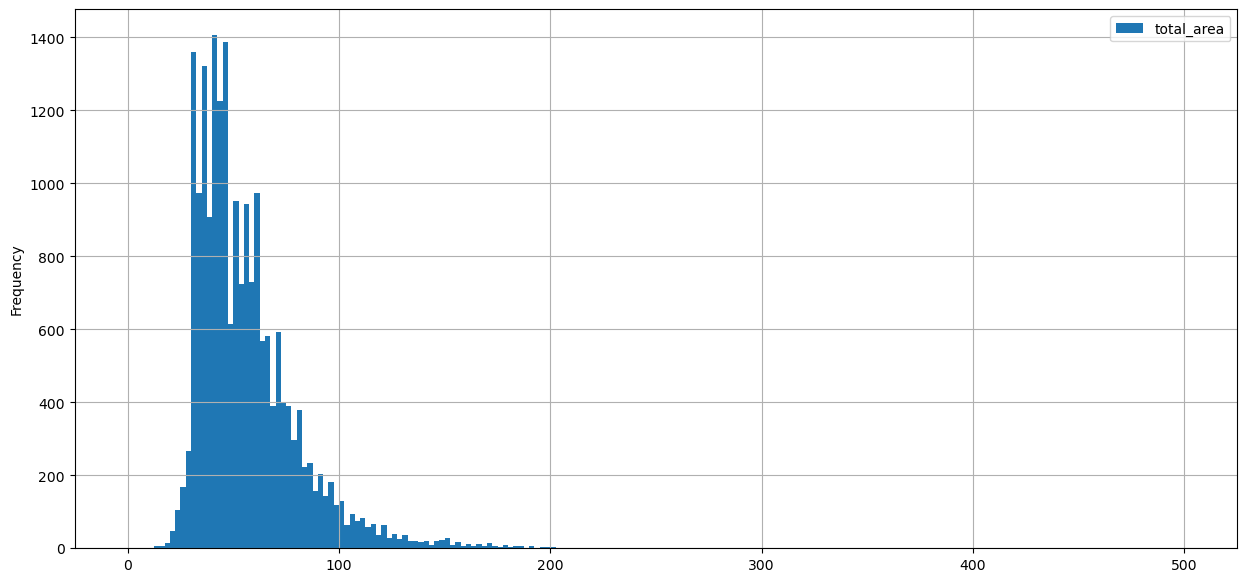

In [53]:
# провожу анализ общей площади
data.plot(y='total_area', kind='hist', bins=200, grid=True, figsize = (15,7), range=(0,500))
data['total_area'].describe()

#### По гистограмме видно, что распределение площади нормальное. Средняя площадь 56 кв.м. (2-х комн) мин 12 (есть подозрение, что это коммерческая плащадь), стандарт почти 24 кв.м.(скорее всего 1-комн кв. или студии), макс 200 кв.м. (ну это уже люксовая недвижимость). Больше дабавить нечего.

count    18433.000000
mean        31.923911
std         15.790381
min          2.000000
25%         18.200000
50%         29.700000
75%         40.700000
max        145.400000
Name: living_area, dtype: float64

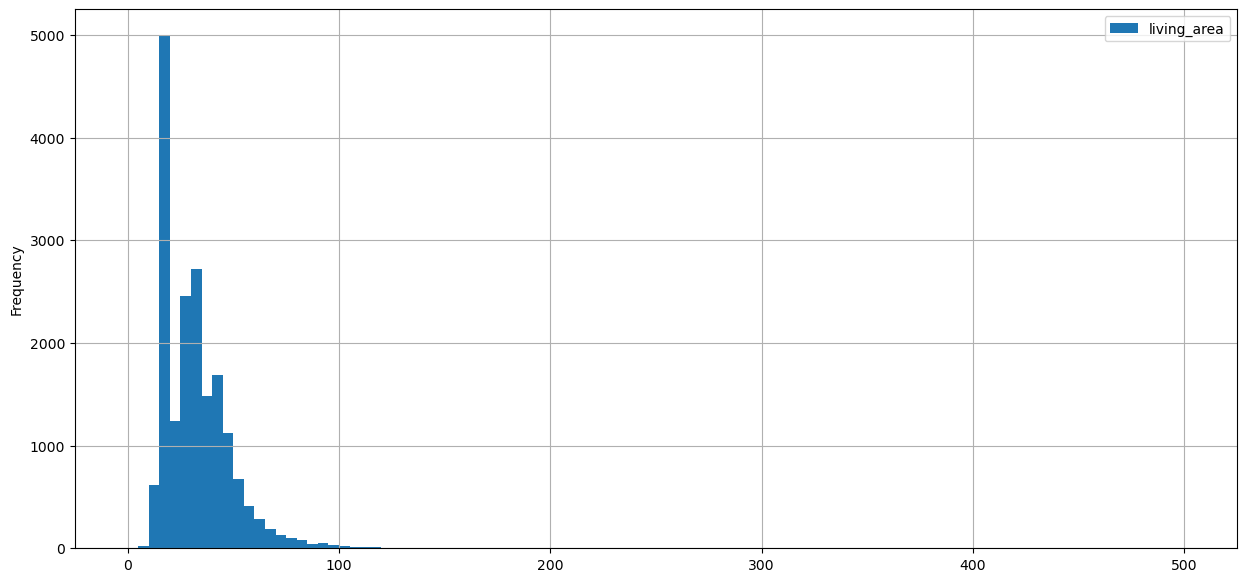

In [54]:
#жилая площадь
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize = (15,7), range=(0,500))
data['living_area'].describe()

#### По гистограмме видно, что рапредление жилой площади нормальное. Что можно отметить, средняя площадь равна 31.92 кв.м., что является нормой для 2-х комн.кв. 15,79 кв.м. стандарт для 1-комн кв. Мин площадь 2 кв.м. выглядит не правдоподобно, т.к. таких квартир нет в природе с такой жилой площадью(будем считать, что это выброс, на общую картину не влияет). Ну квартира с жил пл. в почти 145 кв.м., можно отнести к люкс недвижимости (к акционерам газпрома;))

count    18070.000000
mean        10.134208
std          4.759173
min          2.000000
25%          7.000000
50%          9.000000
75%         11.550000
max         65.000000
Name: kitchen_area, dtype: float64

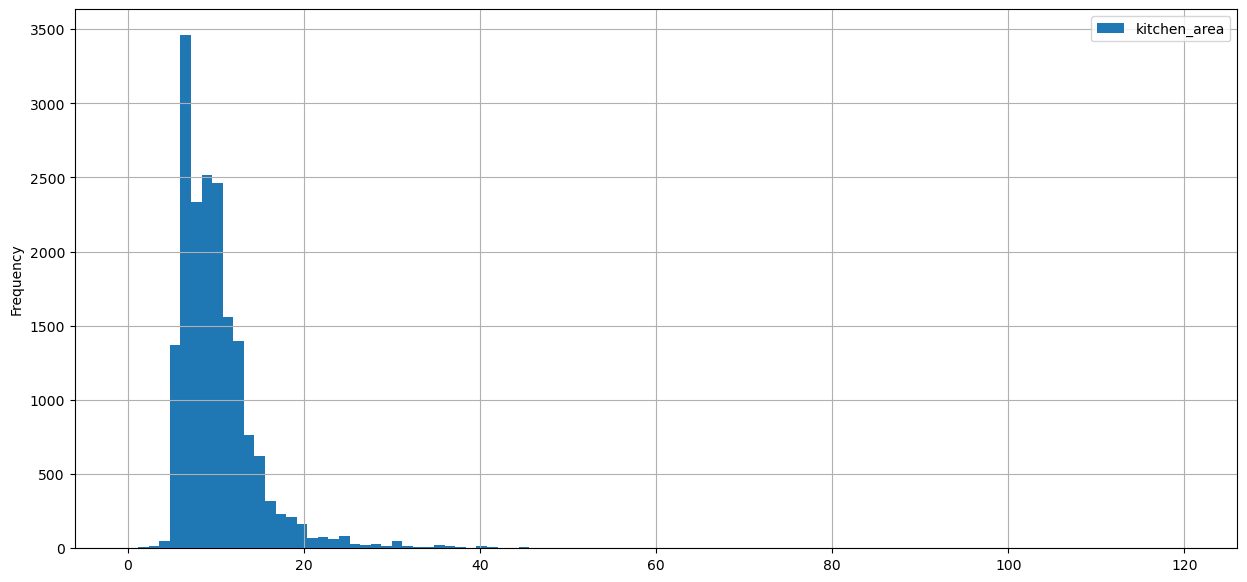

In [55]:
#площадь кухни
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize = (15,7), range=(0,120))
data['kitchen_area'].describe()

#### Выводы все теже, что и в исследованиях выше. Все в норме, ср.значение чуть больше 10 кв.м.,это стандарт для кухни 2-х комн. квартиры. 4,75 кв.м., это для 1-комн кв. мин. квадратура в 2 будем считать выбросом(параметр не значителен. общую картину не портит), кухня с квадратурой 65 кв.м., это люксового класса квартиры.

count    2.009400e+04
mean     5.442687e+06
std      3.595372e+06
min      4.300000e+05
25%      3.390000e+06
50%      4.500000e+06
75%      6.300000e+06
max      3.000000e+07
Name: last_price, dtype: float64

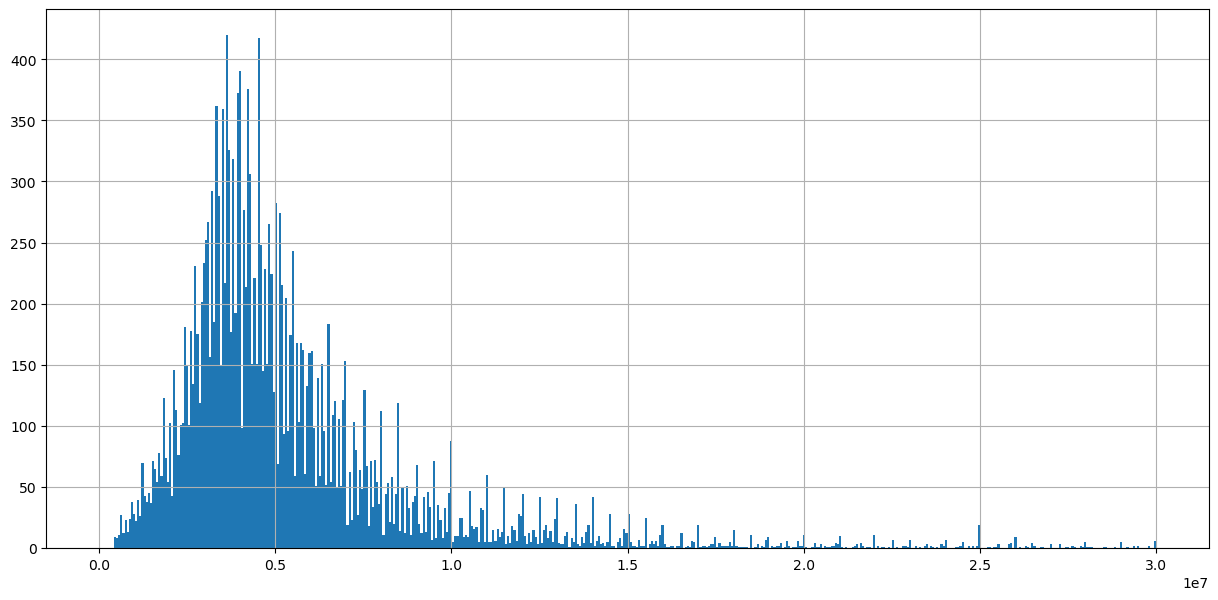

In [56]:
#цена объекта;
#data['last_price'] = data['last_price']/1000000 # разделим на 1 млн, чтоб было читаемо при построениее гистограммы
#data.plot(y='last_price', kind='hist', bins=1000, grid=True, figsize = (15,7))
data['last_price'].hist(bins=500, figsize=(15,7), range=(0, 30000000))
data['last_price'].describe()

#### Как видно из гистограммы, больше всего выставлено на продажу квартир в деапозоне цен от 4-6 млн. 

count    20094.000000
mean         1.980342
std          0.928415
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

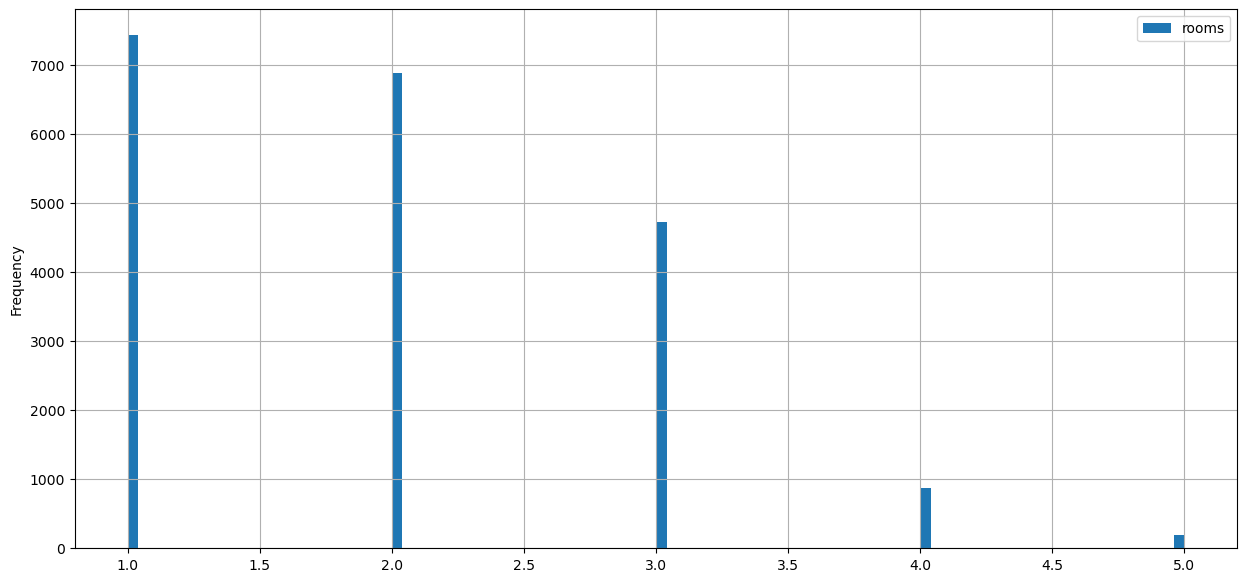

In [57]:
#Проведм анализ количества комнат
data.plot(y='rooms', kind='hist', bins=100, grid=True, figsize = (15,7), range=(1,5))
data['rooms'].describe()

#### На гистограмме видно, что большинство кваритр с комнатами от 1 до 3. Есть предложения с 4-х комн.кв., а также с 5 комнатами.

count    20094.000000
mean         2.715020
std          0.183176
min          2.000000
25%          2.600000
50%          2.729608
75%          2.729608
max          4.000000
Name: ceiling_height, dtype: float64

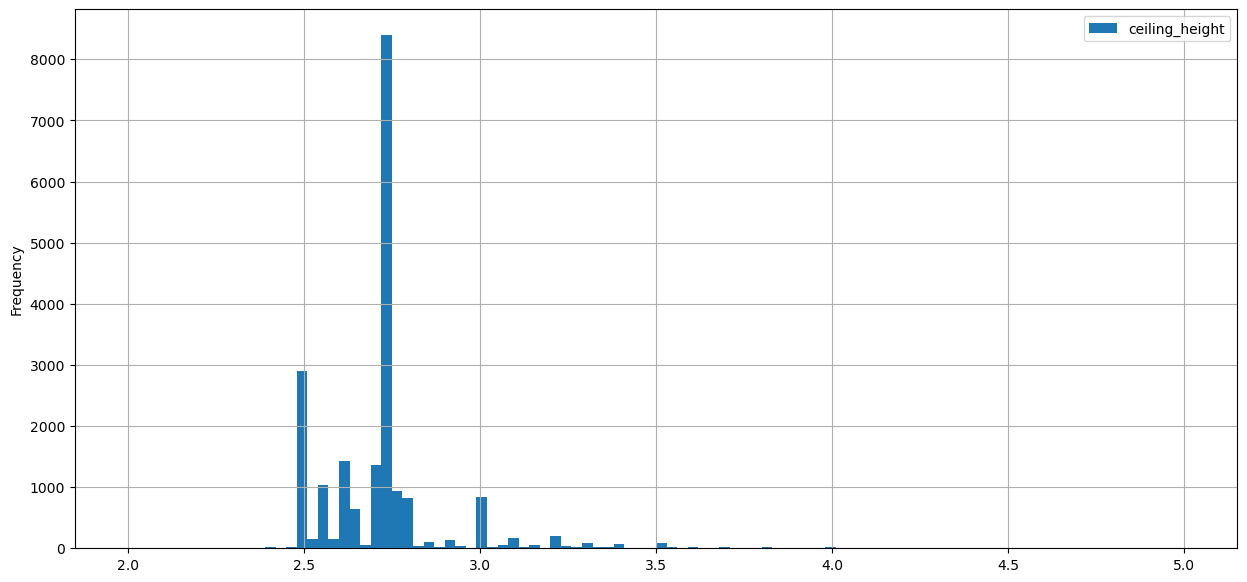

In [58]:
# высота потолков
data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize = (15,7), range=(2,5))
data['ceiling_height'].describe()

#### Как показывает гистограмма, высота потолков распределилась в основном в 2.71, что является стандартом для жилищной застройки. Но также есть и не стандартные потолки, более низкие(считаю, что это более дешевое жилье "эконом") и высокие 4 м (премиум класс). Поэтому двигаемся дальше.

count    20094.000000
mean         5.997860
std          4.941024
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         32.000000
Name: floor, dtype: float64

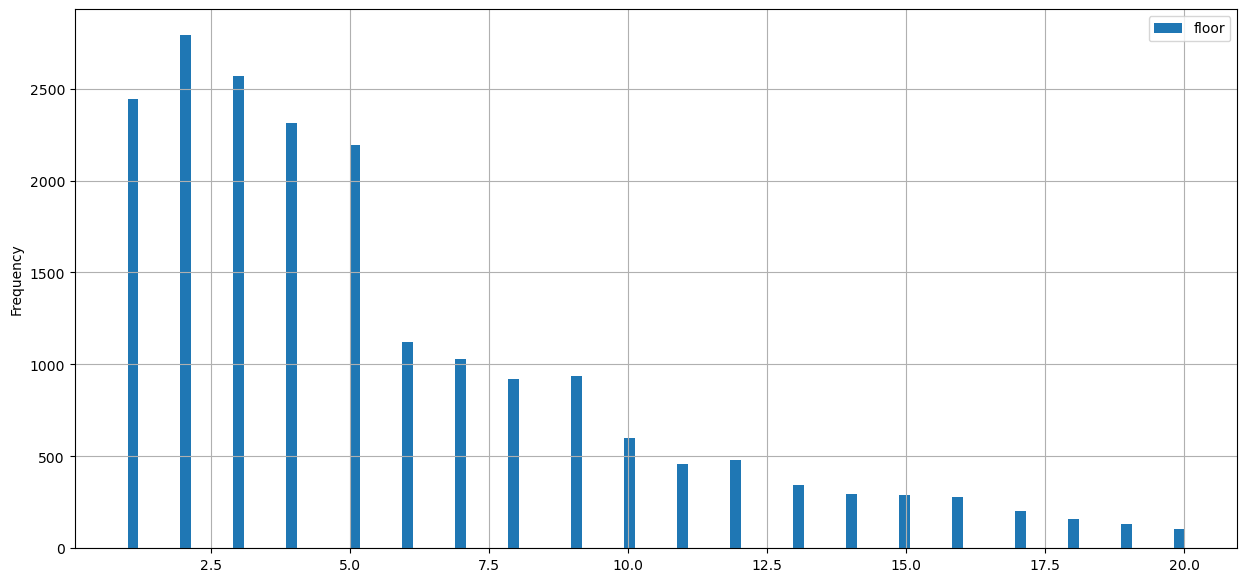

In [59]:
#этажность
data.plot(y='floor', kind='hist', bins=100, grid=True, figsize = (15,7), range=(1,20))
data['floor'].describe()

#### Больше всего квартир продается на 1 - 5 этаж, далее идет на убывание. Скорее всего это квартиры котрые расположены в близь лежащих населенных пунктах (районах Спб), в небольших городках высотная застройка не велась. макисмум 9 этажей, а так в основном 5 этажные дома.

count      20094
unique         3
top       другой
freq       14922
Name: floor_category, dtype: object

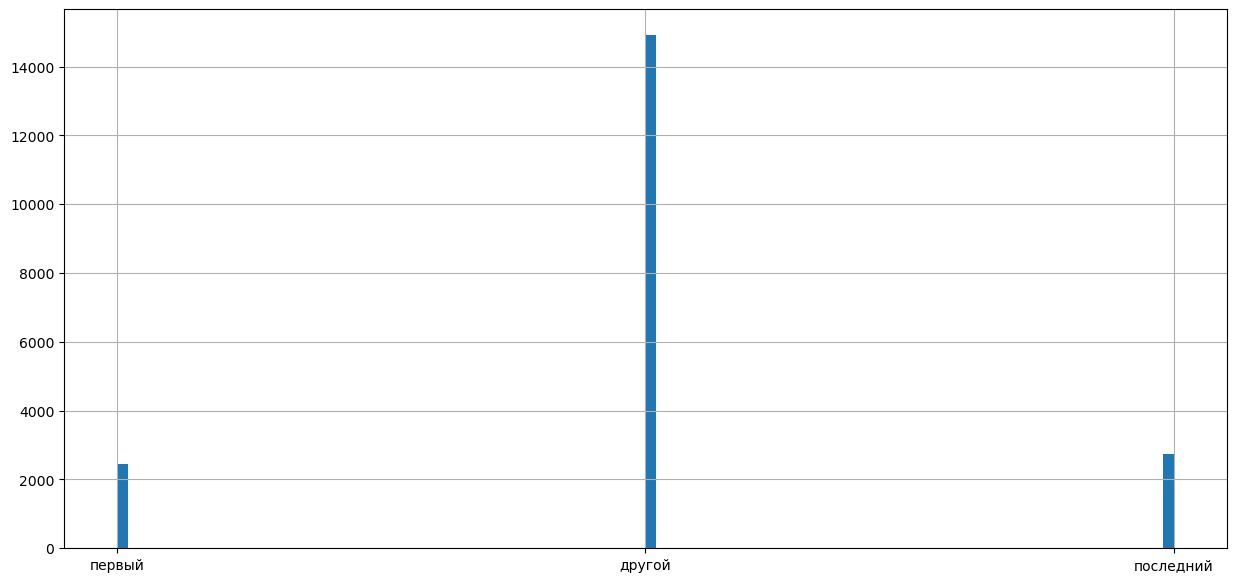

In [60]:
# тип этажа
data['floor_category'].hist(bins=100, figsize = (15,7))
data['floor_category'].describe()

#### Из гистограммы видно, что больше всего продаж квартир расположенных в категории другой. Квартиры расположнные на первых и последних этажах покупают значительно реже.

count    15455.000000
mean     14483.048657
std       8523.793883
min        208.000000
25%       9806.500000
50%      13265.000000
75%      16461.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

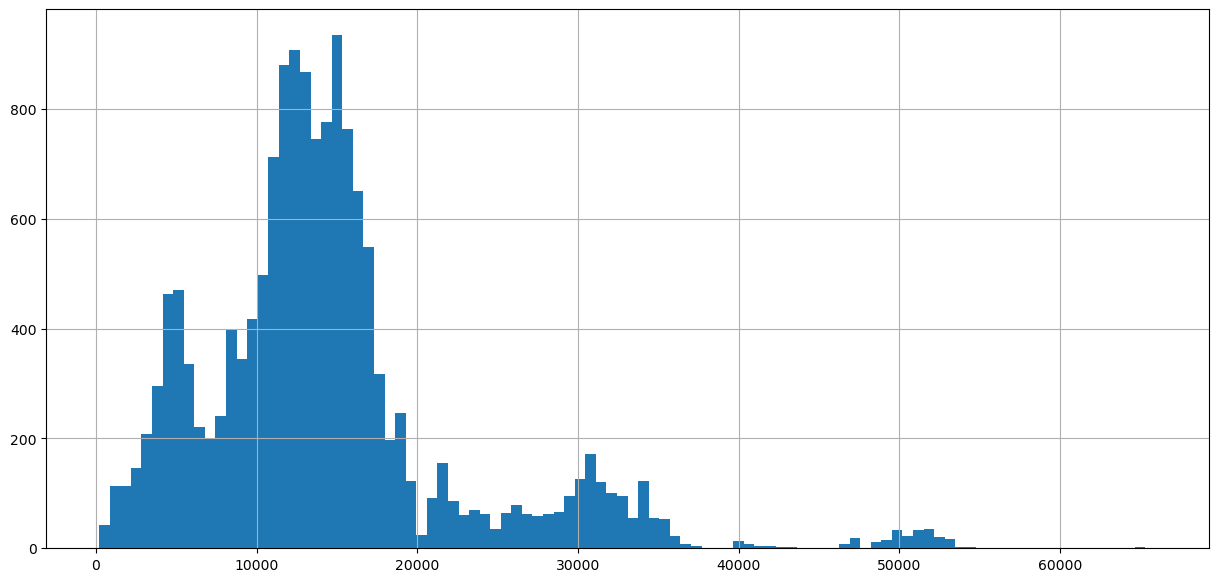

In [61]:
# расстояния до центра в метрах
data['cityCenters_nearest'].hist(bins=100, figsize = (15,7))
data['cityCenters_nearest'].describe()

#### Из гистограммы видно, что больше всего продаж квартир расположенных в радиусе около 14000+-500 метров от центра.

count    20094.000000
mean     28883.023145
std      11232.405258
min          0.000000
25%      20892.750000
50%      28793.672193
75%      34957.750000
max      84869.000000
Name: airports_nearest, dtype: float64

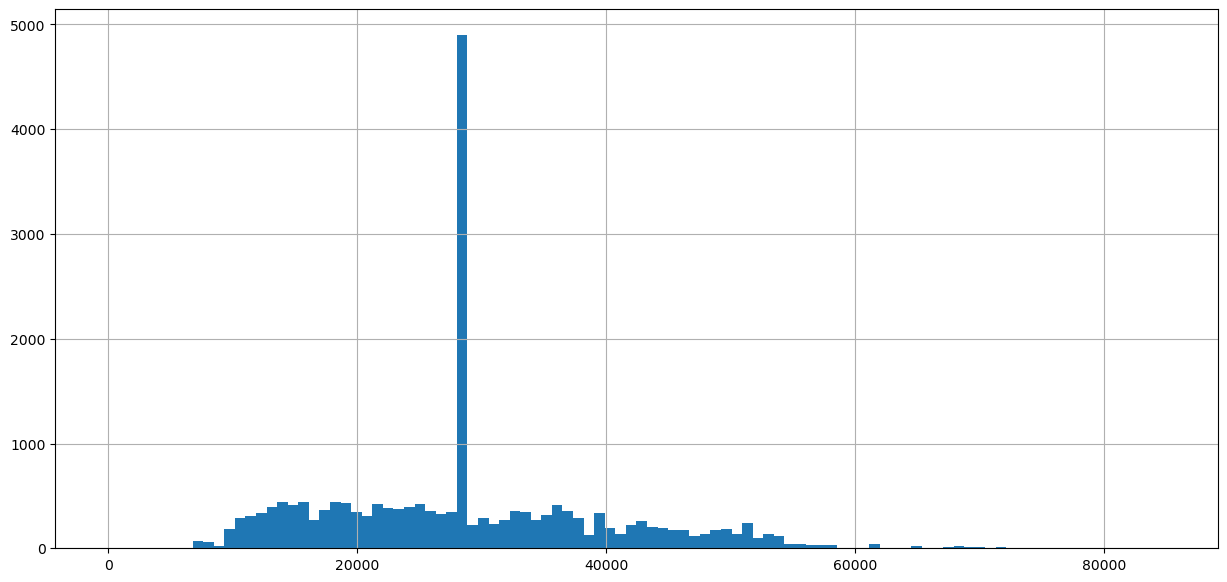

In [62]:
data['airports_nearest'].hist(bins=100, figsize = (15,7))
data['airports_nearest'].describe()

#### Видим пик продаж квартир с расстоянием до аэропорта около 30 км. Аэропорт, один из ценообразующих факторов)

count    20094.000000
mean       467.801583
std        200.205331
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64

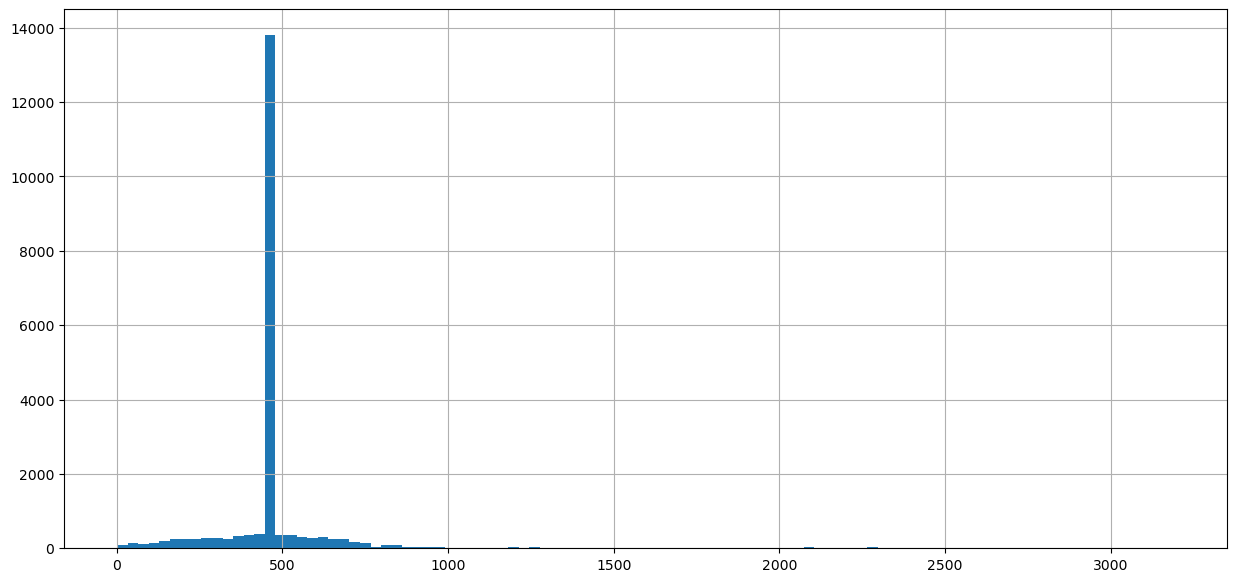

In [63]:
data['parks_nearest'].hist(bins=100, figsize = (15,7))
data['parks_nearest'].describe()

#### Из картинки видно, что основная масса предложений имеет в радиусе около 500 метром, парк.

count    20094.000000
mean         2.583458
std          1.785484
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

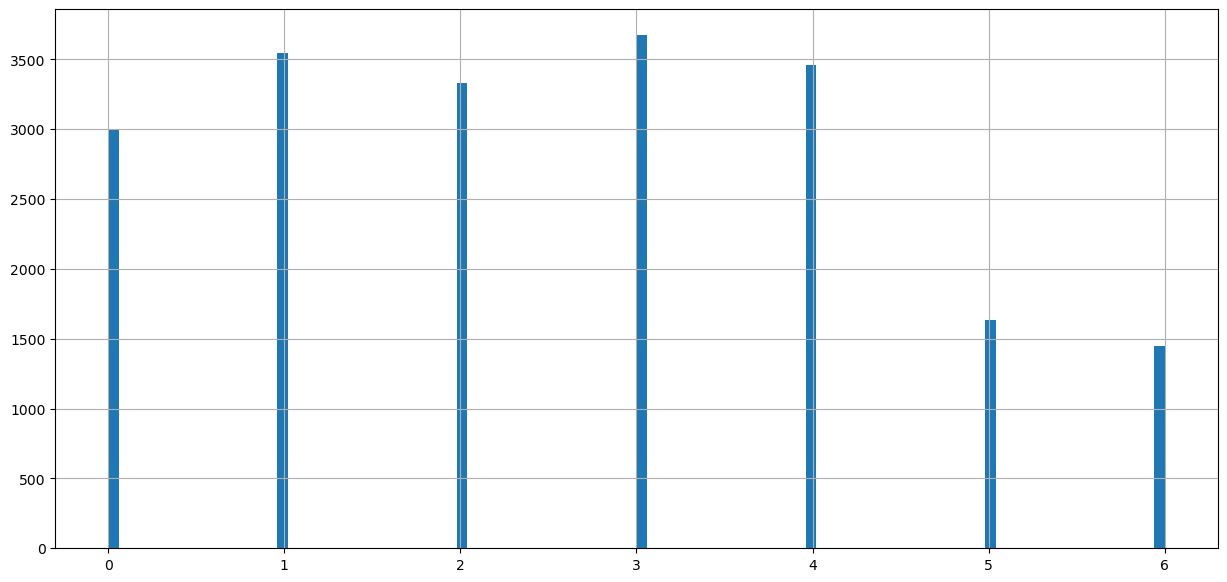

In [64]:
#день недели и месяц
data['weekday'].hist(bins=100, figsize = (15,7))
data['weekday'].describe()

#### Дни недели выпали с воскрксенья по четверг. Потом видно падение подачи объявлений. Что на это повлияло сказать сложно.

count    20094.000000
mean         6.585399
std          3.486178
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

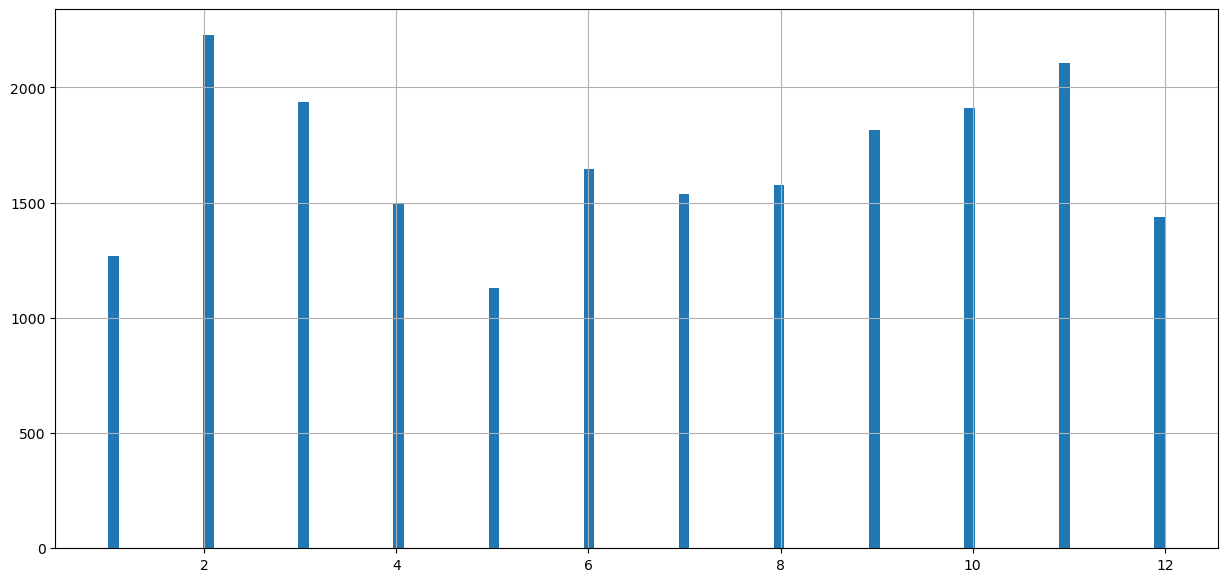

In [65]:
data['month'].hist(bins=100, figsize = (15,7))
data['month'].describe()

### Как видно из графика, основные месяцы подачи объявлений о продажи выпали на февраль, март, апрель, в мае падение, далее идет подъем и к зимним месяцем существенно видим увеличение продаж.

count    20094.000000
mean       178.702548
std        217.318194
min          2.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

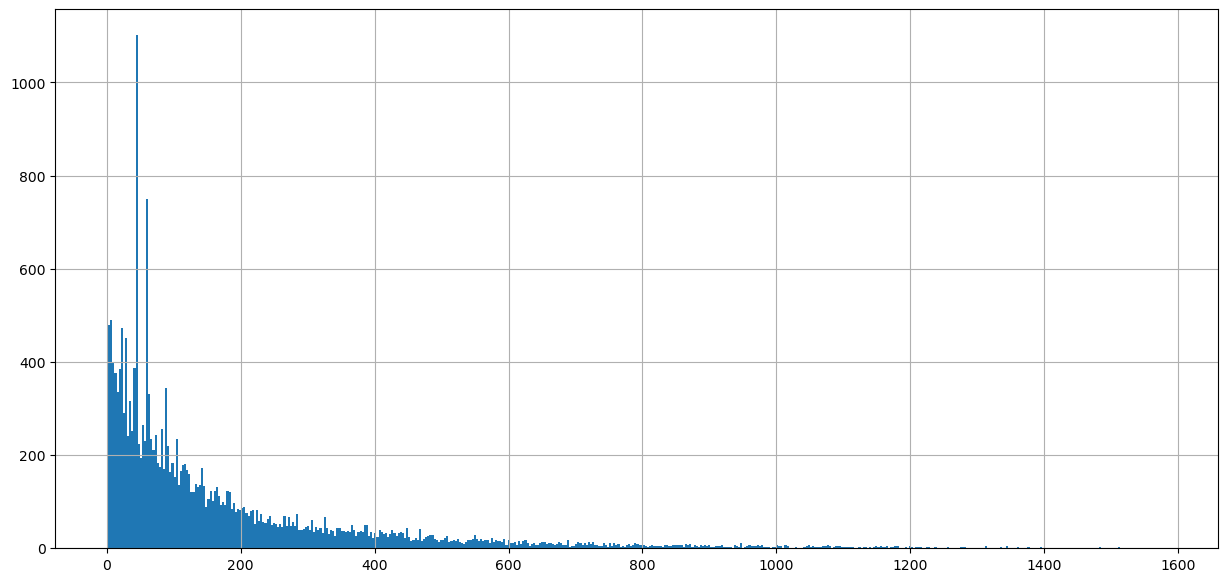

In [66]:
#скорость продажи квартир
data['days_exposition'].hist(bins=500, figsize = (15,7))
data['days_exposition'].describe()

### После исправлений выше в предобработке, график изменился.
#### Сейчас пик сместился к положительным значениям. Видно, что минимальный день продажи составляет 2 дня, средний 178 дней. Стандартный срок экспозиции о продаже ОН, составляет 217 дней (чуть более девяти месяцев), самая долгая экспозиция составила 1580 (почти 4,5 года, подозреваю, что это объявления с нестандартными параметрами квартир).Попробую посчитать среднюю и медиану, построим диаграмму размаха.

#### расчеты и выводы исправлены.

(-100.0, 600.0)

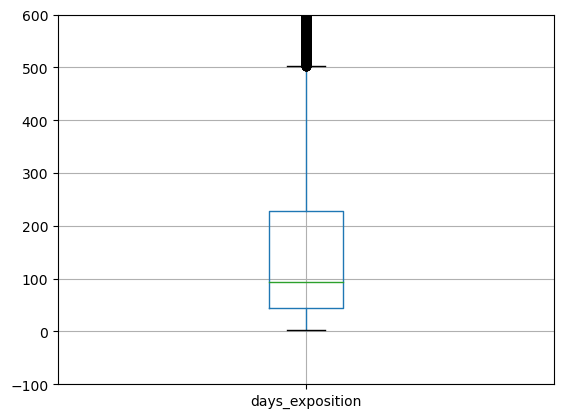

In [67]:
data.boxplot('days_exposition')
plt.ylim(-100, 600)

### Как видно из диаграммы, медиана близка к значению 90, это нам говрит о том, что квартиры продаются около 3-х месяцев. Среднее значение  больше чем в два раза медианного, это около 230 дней, что похоже на правду. Верхнее значение чуть больше 500 дней, это квартиры с ценником выше среднего и не расчитаны на массовый сегмент покупателей, к таким квартирам можно отнести квартиры премиум класса. Нижний ус находится на 2) (другого там быть не может), т.е. квартиры продавались на следующий  день публикации объявления, можно сделать вывод, что это была срочная продажа по цене ниже рынка.

In [68]:
#Создам отдельный df с интересующими нас факторами
data_factor = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
data_factor.corr().style.background_gradient('coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.779167,0.661555,0.590015,0.484797
total_area,0.779167,1.000000,0.920822,0.544095,0.788164
living_area,0.661555,0.920822,1.000000,0.292611,0.878743
kitchen_area,0.590015,0.544095,0.292611,1.000000,0.163302
rooms,0.484797,0.788164,0.878743,0.163302,1.000000


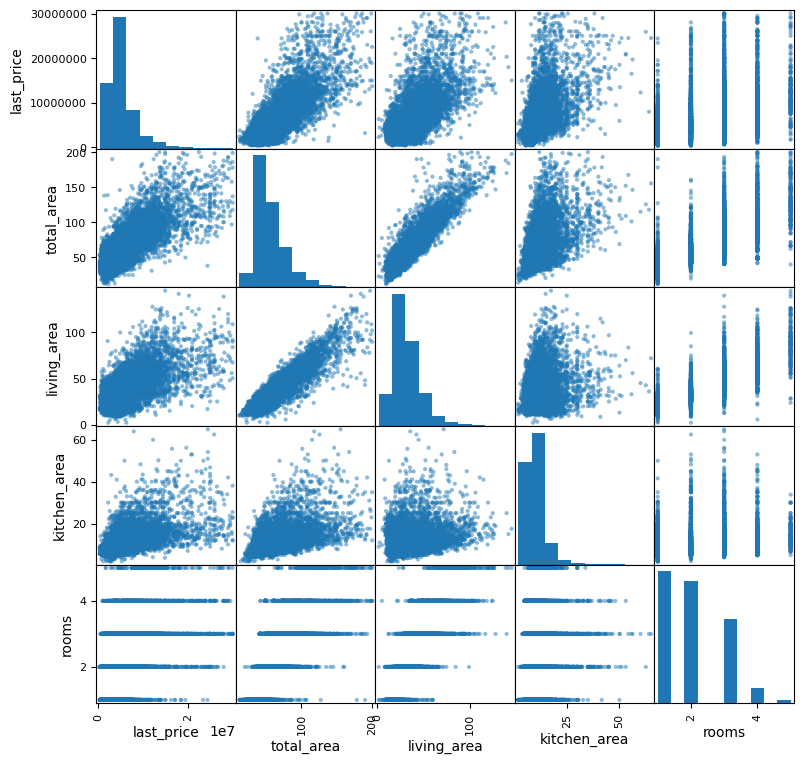

In [69]:
pd.plotting.scatter_matrix(data_factor, figsize=(9, 9));# построим гистограмму распредления

### Тяжело анализировать такое количество ЦОФов(ценообразующих факторов), но попробую описать свои наблюдения:
#### 1_цена_общ_площадь. Видно, что чем больше площадь квартиры тем выше ее стоимость (что логично);
#### Больше всего квартир продается в диапазоне цен от 5,5 - 6,5 млн.р., общей площадью около 56 кв.м., где жилая площадь около 32 кв.м., площадь кухни около 10 кв.м. Что является стандартом для 2-х-3х комн квартир. Т.е. самые ходовые квартиры, это 2-х и 3-х комнатные, по моему мненнию.
#### Чем больше комнат тем больше цена. Но зависимость слебее чем от плащади квартиры, коэффициент корреляции 0,47. Для 4-х и 5-ти комн. квартир предложений на рынке меньше, чем двух-трехкомнатных.

Исследуем зависимость цены от общей площади, жилой площади, площади кухни, колическтва комнат, этажа и даты размещения (дня недели, месяца и года).

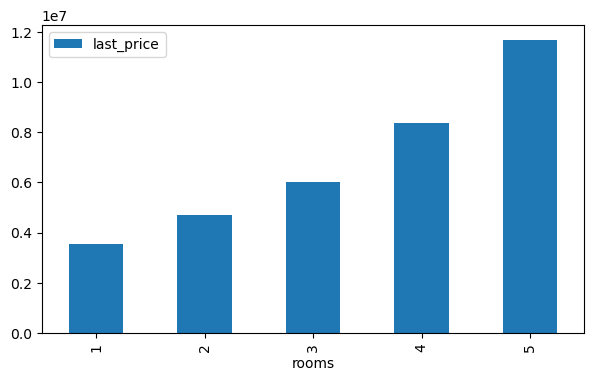

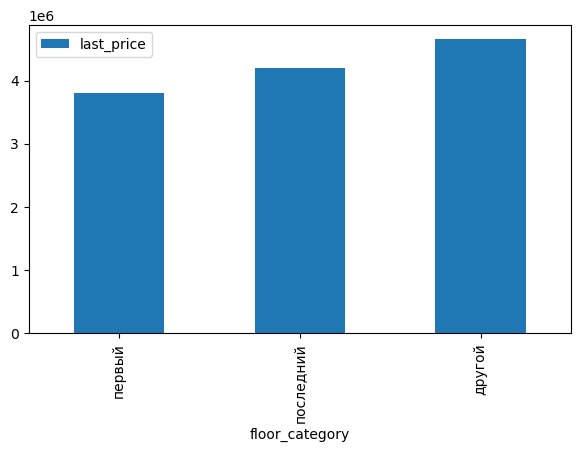

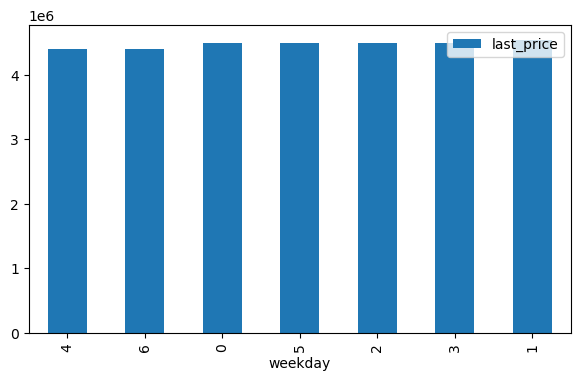

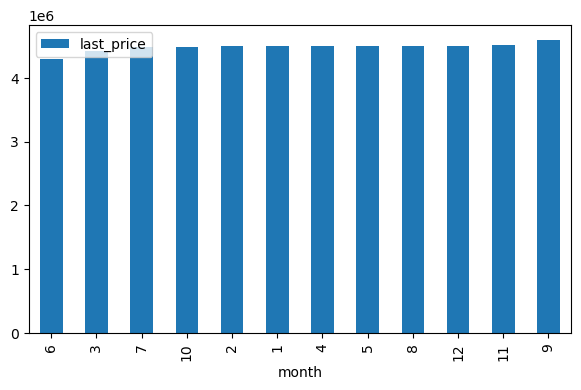

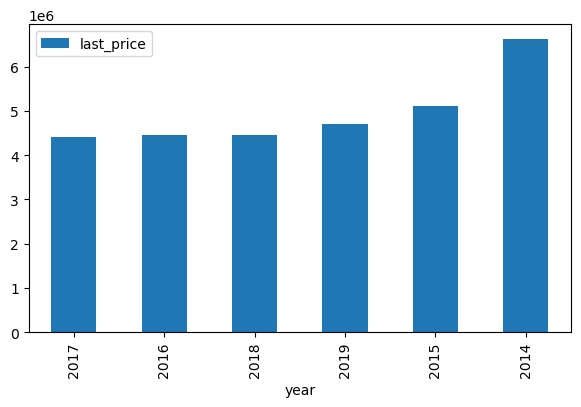

In [70]:
data_price = ['rooms', 'floor_category', 'weekday', 'month', 'year']

for name in data_price:
    (data.pivot_table(index=name, values='last_price', aggfunc='median')
    .sort_values(by='last_price').plot(y='last_price', kind='bar', figsize = (7,4)))

### Итак, что мы можем тут сказать. Самые дорогие, это пятикомнатные квартиры, это и не удивительно, ведь там по логике будет и самая большая квадратура как общая, так и жилая (далее по убыванию). Потом, самые продаваемы квартиры, это которые распологаются между первым и последним этажем.
### Зависимость цены от дня недели и месяца не наблюдается, сезонность не влияет на стоимость квартиры. А вот зависимость цены квартиры от года продажи, видно очень четко. 2014 год, это год мирового кризиса, начинается обесценивание рубля, следовательно люди чтоб сохранить свои сбережения стали скупать  квартиры, а где есть повышенный спрос там и растет цена.

#### Расчитаем среднбб стоимость топ-10

<AxesSubplot:xlabel='locality_name'>

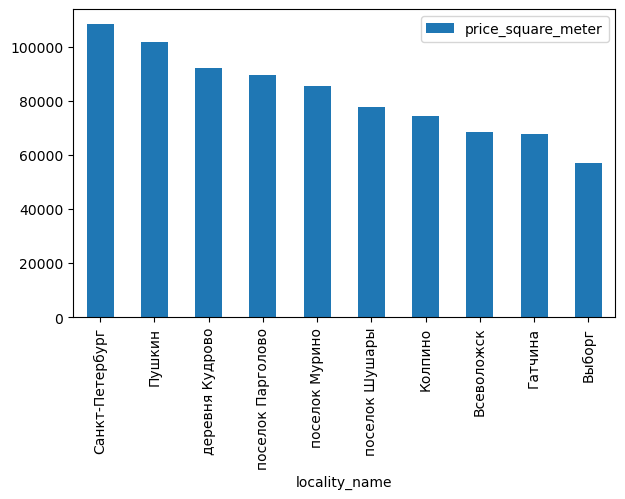

In [71]:
(data.pivot_table(index='locality_name', aggfunc={'last_price':'count', 'price_square_meter':'mean'})
.sort_values(by='last_price', ascending=False).head(10) # расчитаем ср. за ква.м.
.sort_values(by='price_square_meter', ascending=False).plot(y='price_square_meter', kind='bar', figsize=(7,4)))# сортируем по среднему,для выделения макс и мин.

### Самая высокая цена за кв.м., это в Питере, что не удивительно, самая низкая - в Выборге. Тенденция такая, чем дальше от областной столицы, тем ниже цена за кв.м.

### Вычисляем среднюю стоимость одного км до центра.

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='mean_price_for_km'>

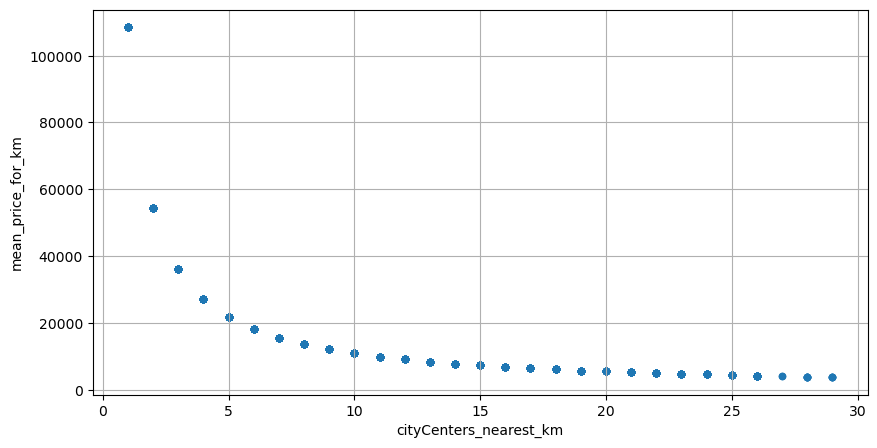

In [72]:
data_spb = data.query('locality_name == "Санкт-Петербург"') #выбираем только квартиры в спб
data_spb = data_spb.dropna(subset = ['cityCenters_nearest'], inplace = False) #убираем пропуски для дальнейшей работы
data_spb['cityCenters_nearest_km'] = data_spb.loc[:, 'cityCenters_nearest'] / 1000 #добавляем столбец с км
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].round() #округялем
data_spb_mean_price_square_meter = data_spb['price_square_meter'].mean() #средняя цена кв.м
data_spb['mean_price_for_km'] = data_spb_mean_price_square_meter / data_spb['cityCenters_nearest_km'] #средняя цена для каждого км
data_spb.plot(x='cityCenters_nearest_km', y='mean_price_for_km', kind='scatter', figsize=(10, 5), grid=True)

### Как видно из графика, чем ближе к центру, тем выше цена одного км.

In [73]:
data_Spb_centr = data_spb[['last_price', 'cityCenters_nearest']]

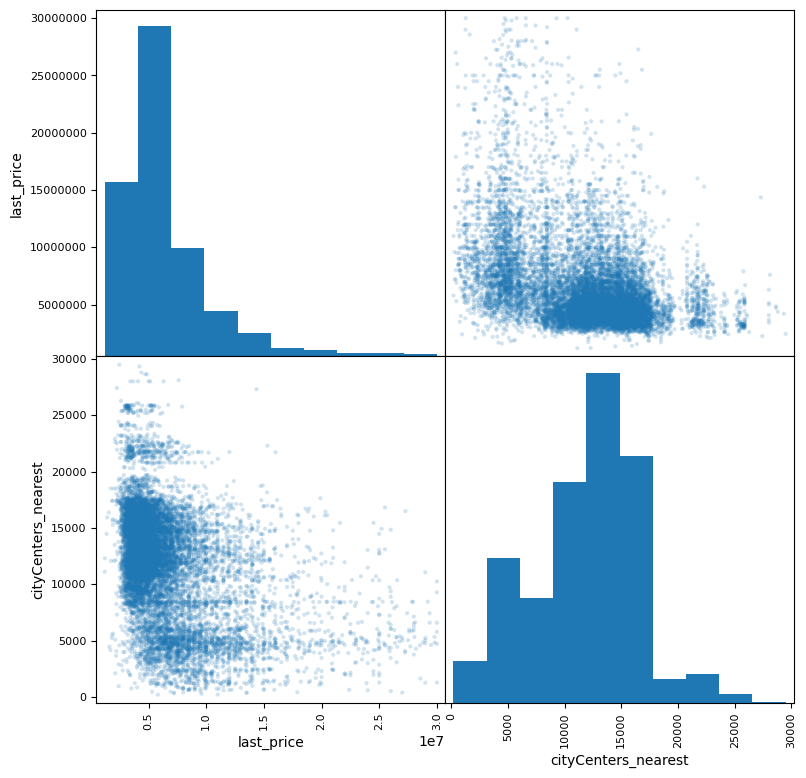

In [74]:
pd.plotting.scatter_matrix(data_Spb_centr, figsize=(9,9), alpha=0.2);

### Как показывает нам гиста. в основном квартиры продавались с расстоянием до центра около от 10 до 15км, со стоимостью от 5-10 млн.р. Чем квартиры ближе к центру. тем они и дороже. что вполне логично.

# 5 Общий вывод

## Проделана огромная работа по анализу рынка недвижимости в С-Петербурге, вот что я хочу отметить:
### Основаная масса квартир продается в диапазоне цен от 5-10 млн, при чем эти квартиры расположены от центра около 15 км., что наталкивает на мысль, о категории покупателей квартир с средним достатком. Далее чем ближе к центру, тем дороже квартиры. также стоить отметить, что много предложений о продаже квартир в радиусе 30 км. от аэропорта. Покупатели предпочитают квартиры расположенные на средних этажах, потом идет последний и первый.
### Самые дорогие квартиры, это в Питере, далее цена снижается пропорционально отдаленности от областной столицы, самые дешевые в Выборге.
### Минимальный день продажи составляет 1 день (возможно это срочная продажа, ниже рынка), средний 126 дней. Стандартный срок экспозиции о продаже ОН, составляет 118 дней (почти 4 месяца). Самый долгий около 1,5 лет (400 дней).
### Основные месяцы подачи объявлений о продаже выпали, на февраль, март, апрель, в мае падение, далее идет подъем и к зимним месяцам видим увеличение продаж.
### Основная масса предложений продажи квартир имеет парк в радиусе около 500 метрах.
### Больше всего квартир продается на 1 - 5 этаж. Большинство кваритр с комнатами от 1 до 3. Есть предложения с 4-х комн.кв., а также с 5 комнатами, но их мало. Основная масса объявлений, это продажа квартир со стандарстными параметрами, есть и отдельные квартиры с квадратурой в 200 кв.м., но таких мало, эти квартры нужно вывести в другой сегмент(премиум) и проводить доп. анализ.